In [5]:
import pandas as pd
df = pd.read_csv('grains/manual_vs_auto.csv')

print(df.head(25))


   Unnamed: 0    Image  Manual  Manual2  Auto_th_2  Auto_th_3  Auto_th_4
0        Set1   Image1    92.0     93.0         70         87         82
1        Set1   Image2    87.0     83.0         60         85         83
2        Set1   Image3   104.0     98.0         74         99         94
3        Set1   Image4    99.0      NaN         73        101        109
4        Set1   Image5    89.0      NaN         59         90         67
5        Set1   Image6   115.0      NaN         82        124        105
6        Set1   Image7   102.0      NaN         68        103         93
7        Set1   Image8   117.0      NaN         77        122         88
8        Set1   Image9   104.0      NaN         88         99        112
9        Set1  Image10   103.0      NaN         69         98         94
10       Set1  Image11    91.0      NaN         61         87         77
11       Set1  Image12   119.0      NaN         79        105        111
12       Set1  Image13     NaN      NaN         65 

C:\Users\User\anaconda3\myanaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Manual', ylabel='Density'>

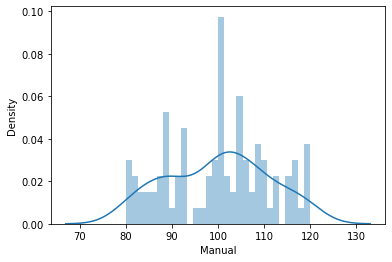

In [8]:
import seaborn as sns
df['Manual'].fillna(100, inplace=True)

sns.distplot(df['Manual'],bins=30)

<AxesSubplot:xlabel='Manual', ylabel='Density'>

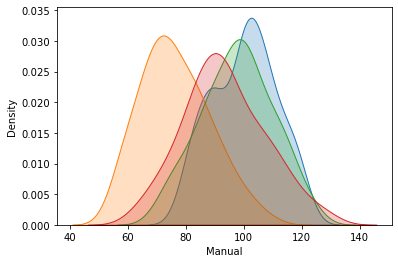

In [13]:
sns.kdeplot(df['Manual'], shade=True)
sns.kdeplot(df['Auto_th_2'], shade=True)
sns.kdeplot(df['Auto_th_3'], shade=True)
sns.kdeplot(df['Auto_th_4'], shade=True)

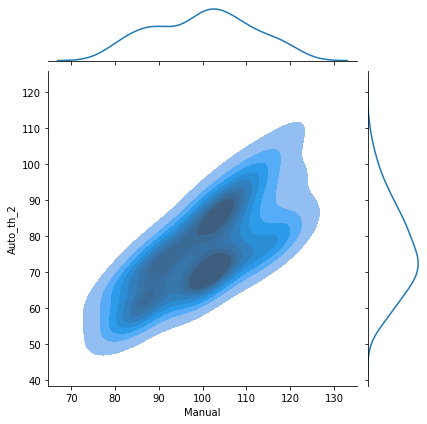

In [16]:
sns.jointplot(x = df['Manual'], y=df['Auto_th_2'], shade=True, kind='kde')

C:\Users\User\anaconda3\myanaconda\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


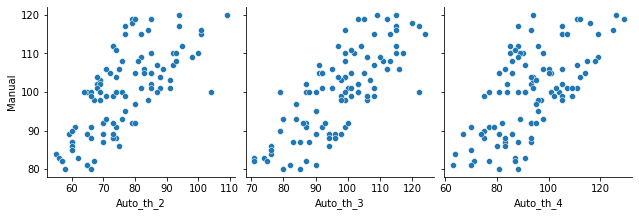

In [18]:
sns.pairplot(df,x_vars=['Auto_th_2','Auto_th_3','Auto_th_4'],y_vars='Manual',size=3)

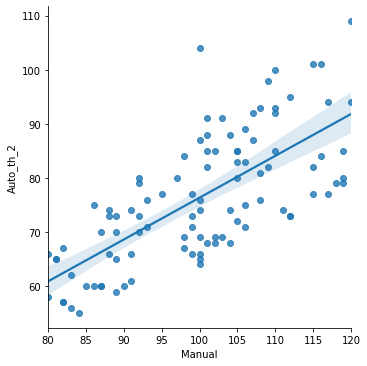

In [22]:
sns.lmplot(x = 'Manual', y='Auto_th_2', data=df, order=1)

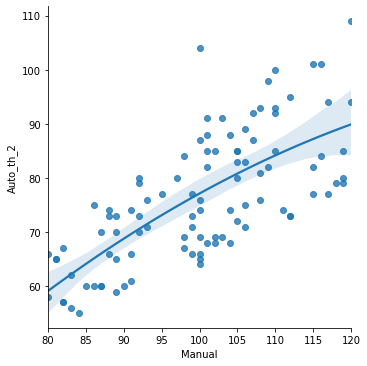

In [23]:
sns.lmplot(x = 'Manual', y='Auto_th_2', data=df, order=2)

In [30]:
df = df.rename(columns={'Unnamed: 0':'Image_set'})
print(df)

   Image_set     Image  Manual  Manual2  Auto_th_2  Auto_th_3  Auto_th_4
0       Set1    Image1    92.0     93.0         70         87         82
1       Set1    Image2    87.0     83.0         60         85         83
2       Set1    Image3   104.0     98.0         74         99         94
3       Set1    Image4    99.0      NaN         73        101        109
4       Set1    Image5    89.0      NaN         59         90         67
..       ...       ...     ...      ...        ...        ...        ...
95      Set4   Image96   106.0      NaN         75        112         98
96      Set4   Image97    80.0      NaN         66         80         88
97      Set4   Image98    92.0      NaN         73         93         95
98      Set4   Image99   116.0      NaN        101        115         93
99      Set4  Image100    99.0      NaN         77        106        102

[100 rows x 7 columns]


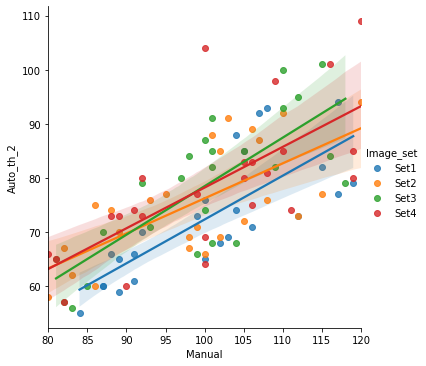

In [31]:
sns.lmplot(x = 'Manual', y='Auto_th_2', data=df, hue='Image_set')

In [33]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(df['Manual'], df['Auto_th_2'])

print("Slope = ", slope)

Slope =  0.772483189743971


<AxesSubplot:xlabel='Image_set', ylabel='Manual'>

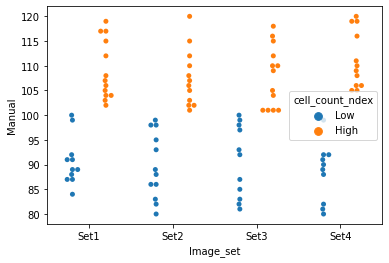

In [38]:
df = pd.read_csv('grains/manual_vs_auto2.csv')

sns.swarmplot(x='Image_set',y='Manual', data=df, hue='cell_count_ndex', dodge=True)